Import Libraries & Frameworks

In [495]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Input,UpSampling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
%matplotlib inline

Importing Dataset here
I will use MNIST For this 

In [496]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [497]:
x_train.shape

(60000, 28, 28)

In [498]:
x_test.shape

(10000, 28, 28)

Seems perfect I will just check frequencies of different digits

In [499]:
pd.DataFrame(pd.DataFrame(y_train).value_counts())

,count
0,
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842


Seems like 1 is most used, so I will choose 1 to be the Normal Digit and all other digits as abnormal

In [500]:
normal_digit = 1
x_train_normal = x_train[y_train==normal_digit]

In [501]:
x_train_normal.shape

(6742, 28, 28)

In [502]:
x_train_normal = x_train_normal[...,np.newaxis]

In [503]:
x_train_normal = x_train_normal / 255.0
x_test = x_test/255.0

In [504]:
x_test = x_test[...,np.newaxis]
x_test.shape

(10000, 28, 28, 1)

Let's just draw some training examples

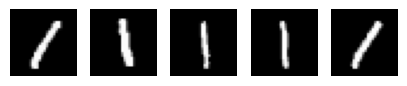

In [505]:
plt.figure(figsize=(5,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train_normal[i],cmap="gray")
    plt.axis('off')
plt.show()

Nice Let's see some random test examples too

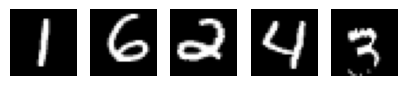

In [506]:
plt.figure(figsize=(5,2))
np.random.seed(42)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[np.random.randint(x_test.shape[0])],cmap="gray")
    plt.axis('off')
plt.show()

In [508]:
autoencoder = Sequential([
    Input(shape=x_train_normal[0].shape),
    # Encoder Part
    Conv2D(filters=4,kernel_size=(3,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=8,kernel_size=(3,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    # Decoder Part
    UpSampling2D(size=(2,2)),
    Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
    UpSampling2D(size=(2,2)),
    Conv2D(filters=1,kernel_size=(3,3),padding='same',activation='sigmoid'),
])

In [509]:
autoencoder.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_208 (Conv2D)             │ (None, 28, 28, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_113               │ (None, 14, 14, 4)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_209 (Conv2D)             │ (None, 14, 14, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 7, 7, 8)        │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_94 (UpSampling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_210 (Conv2D)             │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_95 (UpSampling2D) │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_211 (Conv2D)             │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,649 (6.44 KB)

 Trainable params: 1,649 (6.44 KB)

 Non-trainable params: 0 (0.00 B)

In [511]:
autoencoder.compile(optimizer="adam",loss='MeanSquaredError',metrics=['mse'])

In [512]:
history = autoencoder.fit(x_train_normal,x_train_normal,epochs=4,validation_split=0.05,verbose=1)

Epoch 1/4
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0559 - mse: 0.0559 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2/4
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 3/4
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4/4
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0033 - val_mse: 0.0033


In [513]:
pd.DataFrame(history.history)

,loss,mse,val_loss,val_mse
0,0.055859,0.055859,0.007341,0.007341
1,0.005559,0.005559,0.004598,0.004598
2,0.004171,0.004171,0.003805,0.003805
3,0.003551,0.003551,0.003291,0.003291


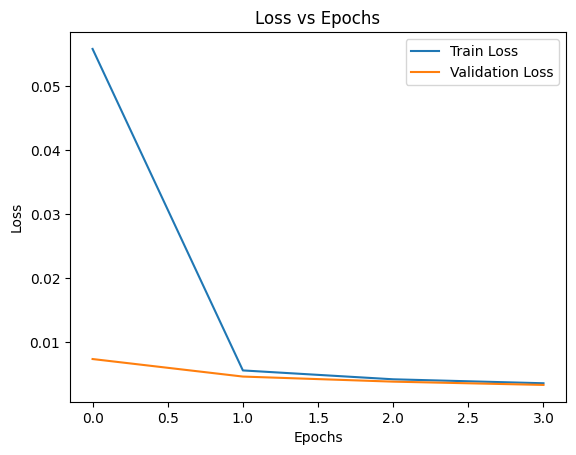

In [514]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train Loss','Validation Loss'],loc='upper right')
plt.title("Loss vs Epochs")
plt.show()

In [515]:
x_test_normal = x_test[y_test==normal_digit]
x_test_normal.shape

(1135, 28, 28, 1)

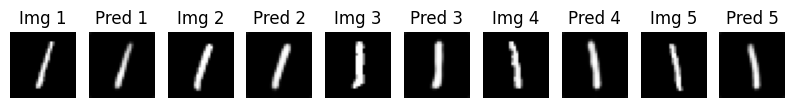

In [516]:
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,10,i*2+1)
    plt.imshow(x_test_normal[i].squeeze(),cmap='grey')
    plt.title(f"Img {i+1}")
    plt.axis("off")
    plt.subplot(1,10,i*2+2)
    plt.imshow(autoencoder.predict(x_test_normal[i][np.newaxis,...],verbose=0).squeeze(),cmap='grey')
    plt.title(f"Pred {i+1}")
    plt.axis("off")
plt.show()

In [517]:
x_test_anomaly = x_test[y_test!=normal_digit]
x_test_normal.shape

(1135, 28, 28, 1)

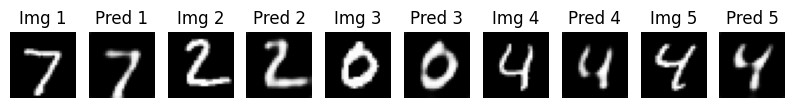

In [518]:
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,10,i*2+1)
    plt.imshow(x_test_anomaly[i].squeeze(),cmap='grey')
    plt.title(f"Img {i+1}")
    plt.axis("off")
    plt.subplot(1,10,i*2+2)
    plt.imshow(autoencoder.predict(x_test_anomaly[i][np.newaxis,...],verbose=0).squeeze(),cmap='grey')
    plt.title(f"Pred {i+1}")
    plt.axis("off")
plt.show()

In [520]:
x_test_pred = autoencoder.predict(x_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [521]:
predict_error = np.mean(np.square(x_test - x_test_pred),axis=(1, 2, 3))

normal_errors = predict_error[y_test == normal_digit]
anomaly_errors = predict_error[y_test != normal_digit]

In [522]:
print(f"Normal error is {np.mean(normal_errors)}\nAnomaly error is {np.mean(anomaly_errors)}")

Normal error is 0.0031155884425090987
Anomaly error is 0.02169175183633242


In [530]:
print(f"Model is detecting Anomalies {np.round(np.mean(anomaly_errors)/np.mean(normal_errors),decimals=0).astype(int)}X better")

Model is detecting Anomalies 7X better


## 7X THATS GOOD

In [542]:
threshold = np.percentile(normal_errors, 98)
print("Threshold:", threshold)

Threshold: 0.008674915249786842


In [560]:
detected = anomaly_errors > threshold
detection_rate = detected.mean()
print(f"Anomaly detection rate: {np.round(detection_rate,decimals=4)*100}%")

Anomaly detection rate: 98.5%


### 98.5% detection is good I think I will stop here soon

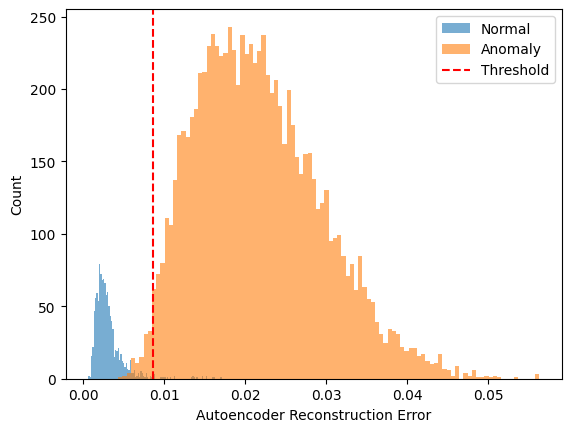

In [576]:
plt.hist(normal_errors, bins=100, alpha=0.6, label="Normal")
plt.hist(anomaly_errors, bins=100, alpha=0.6, label="Anomaly")
plt.axvline(threshold, color="red", linestyle="dashed", label="Threshold")
plt.legend(['Normal','Anomaly','Threshold'])
plt.xlabel("Autoencoder Reconstruction Error")
plt.ylabel("Count")
plt.show()

#### That's it

# Conclusion
### Anomaly Detection Rate - 98.5%
### Threshold - 95% percentile of Normal reconstruction errors === 0.008
### ~7× higher reconstruction error for anomalous digits